# MANDATORY CODING

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
import re

In [ ]:
# PART 1
df = pd.read_table(r'C:\Users\mirza\Downloads\Human proteome filtered.tsv.gz', header=2,
                   names=["Entry", "Entry Name", "Length", "Mass", "Sequence", "EC number", "Protein families"])

display(df.head(3))

In [ ]:
# PART 2
df.describe()

In [ ]:
# PART 3
fig, ax = plt.subplots()
ax.scatter(df['Length'], df['Mass'], color = 'black', facecolors = 'none')
plt.xlabel("Length")
plt.ylabel("Mass")

###### It can be seen from the plot that the longer the protein more mass it has.
###### To prove this I will use pearson (linear correlation)

In [ ]:
#take all rows from df and mass and length columns
df.loc[:, ['Mass', 'Length']].corr().round(decimals=4)
#correlation between mass and length is 0.9994

In [ ]:
# PART 4
Neurexin_df = df.loc[df['Protein families'] == 'Neurexin family']
TUBGCP_df = df.loc[df['Protein families'] == 'TUBGCP family']

In [ ]:
Neurexin_df['Length'].describe()

In [ ]:
TUBGCP_df['Length'].describe()

###### Neurexin family has mean of 1205.70
###### TUBGCP family has mean of 608.68

###### t-test will show if the mean is significant

In [ ]:
t_stat, t_pval = ttest_ind(Neurexin_df['Length'], TUBGCP_df['Length'], equal_var=False)

print("T-test of two datasets:", t_pval)

#number is very small 7.28e-09, so there isn't any significant between the means

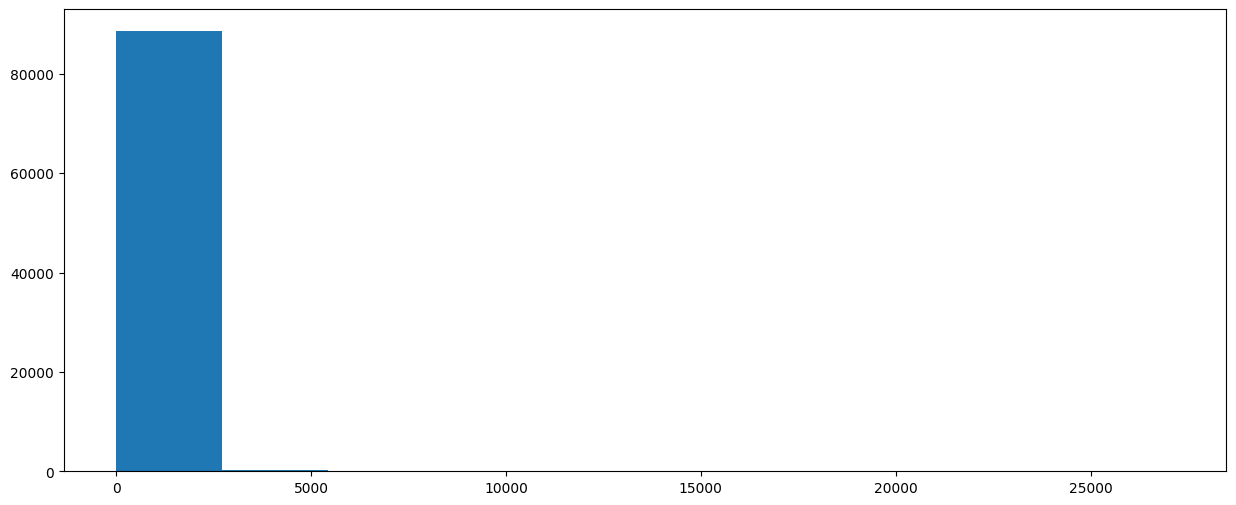

In [64]:
# PART 5
fig, ax = plt.subplots(figsize = (15, 6))
_ = ax.hist(df['Length'])

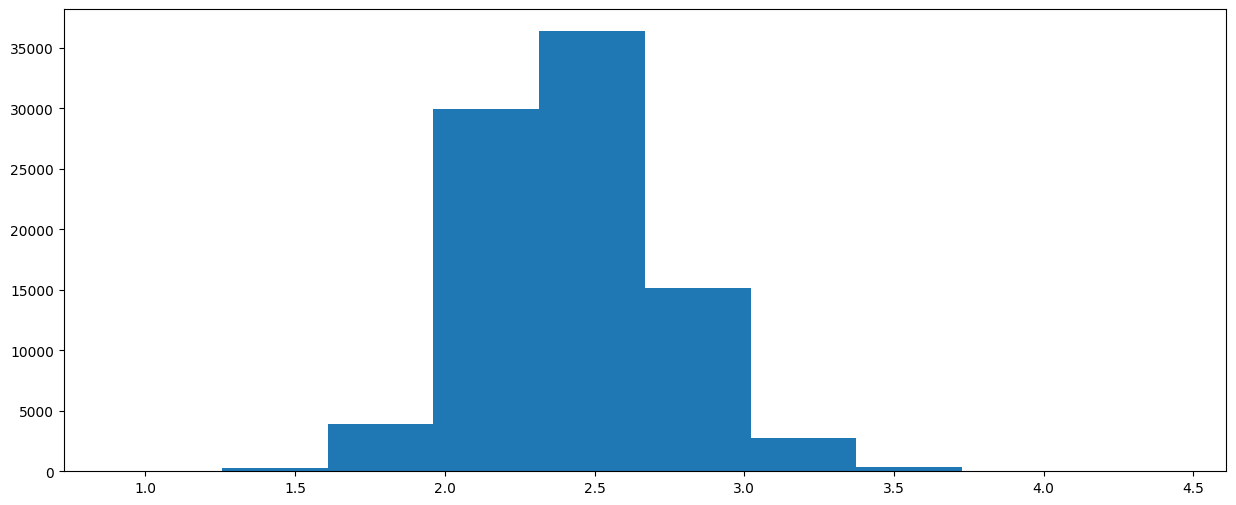

In [65]:
#dataset contains only length multiplied by log10
log10_length = np.log10(df.loc[:, 'Length'])
fig, ax = plt.subplots(figsize = (15, 6))
_ = ax.hist(log10_length)

###### Most of the lengths in first graph is put in first bin (len is 0-25000)
###### On second graph lengths are binomaly distributed (most lengths are in middle bins and they are less frequently distributed on the sides)

# ELECTIVE CODING

In [ ]:
# PART 2

In [ ]:
# PART 3

regex = r'.[HYF].C..C...F.[ST]...L..H.'

#len(df) is 88805
for i in range(88804):
    match = re.findall(df.loc[i, 'Sequence'], str(regex))
    if len(match) > 0:
        print(match, i)